In [1]:
def mapped_circle(center, radius, f, num_circles = 5, num_splines = 10, color = 'orange', thickness = .4, fillalpha= .1):
    center_coords = (CDF(center).real(), CDF(center).imag())
    radii = [radius/num_circles * k for k in range(1, num_circles + 1)]
    angles = [pi *θ / (num_splines) for θ in range(num_splines)]
    coords_f = lambda x,y : ((z := f(x + I*y)).real(), z.imag())
    t = var('t')
    spline = lambda θ : parametric_plot(coords_f(cos(θ)*t + center_coords[0] , sin(θ)*t + center_coords[1]), (t , -radius, radius), color = color, thickness = thickness)
    circ = lambda r : parametric_plot(coords_f(r*cos(t) + center_coords[0], r*sin(t) + center_coords[1]), (t,0,2*pi), color = color, fill = True, fillcolor = color, fillalpha = 0.1, thickness = thickness)
    return sum(spline(θ) for θ in angles) + sum(circ(r) for r in radii) 

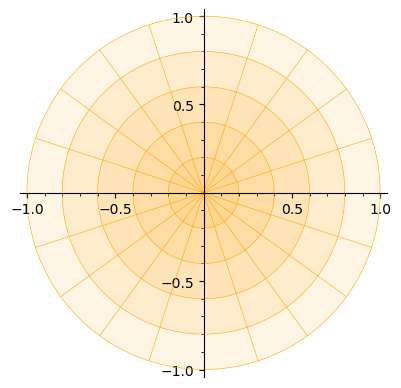

In [2]:
id(z) = z
mapped_circle((0,0), 1, id)

<ipython-input-1-c831270e3ae5>:7: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  spline = lambda θ : parametric_plot(coords_f(cos(θ)*t + center_coords[Integer(0)] , sin(θ)*t + center_coords[Integer(1)]), (t , -radius, radius), color = color, thickness = thickness)


<ipython-input-1-c831270e3ae5>:8: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  circ = lambda r : parametric_plot(coords_f(r*cos(t) + center_coords[Integer(0)], r*sin(t) + center_coords[Integer(1)]), (t,Integer(0),Integer(2)*pi), color = color, fill = True, fillcolor = color, fillalpha = RealNumber('0.1'), thickness = thickness)


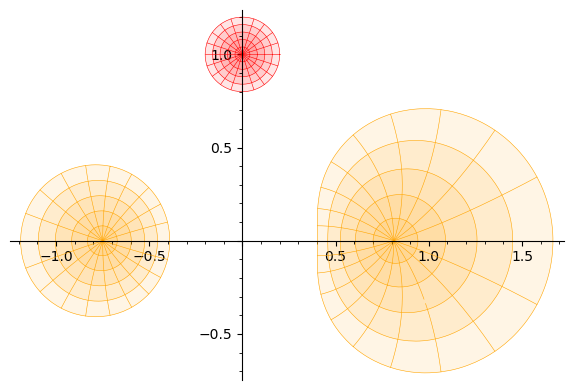

In [16]:
f(z) = z^2 + 0.25
mapped_circle(1*I, 0.2, id, color='red') + mapped_circle(1*I, 0.2, f) + mapped_circle(1*I, 0.2, f(f(z)))